# Mental Health in the Tech Industry Analysis

---
## Sources and Links
Kaggle dataset : [Mental Health in the Tech Industry](https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry)

Website used to create ERD : [dbdiagram.io](https://dbdiagram.io)

---
# Overview

- title
- sources and links
- overview
- imports

- business understanding
    - business objectives
    - situation assesment
    - data mining goals
    
    - project plan
- data understanding
    - data properties
    
    - ERD
- methodoligy
- functions
- exploritory data analysis
- data insight
    - gender and age spread
    - industry representation
    
    - mental health
        - age
        - gender
        
        - job type

---
# Imports

Here we import the necessary libraries to understand the data as well as alter it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from pandasql import sqldf
from datetime import datetime

In [2]:
# this cell is just to show the last time this notebook was updated
now = datetime.now()
print(f'This notebook was last updated at : {now} PST')

This notebook was last updated at : 2025-10-15 17:54:40.345262 PST


---
# Business understanding

This notebook is designed to look into the mental health of those who primarily work within the tech industry. This data then can be used to assist thoese who are struggling with mental health issues and get them the help they need. 

- business objectives 
    - quantify mental health within the workplace
        - success is identifying patterns that cause issues and minimizing said causes
- situation assesment 
    - resources available
        - survey answers from 2693 individuals
    - resources unavailable
        - metadata on encoded data such as what 1, 0 and -1 mean
        - whether this data is real or created
        - specific location on where this data was gathered
- data mining goals
    - asses and understand the data provided
- project plan
    - utilize this survey to understand the needs of those struggling with mental health

---
# Data Understanding

The data within this notebook is gathered from [Kaggle](https://www.kaggle.com). The data is as follows :

- data properties 
    - this data is stored as a `sqlite` file, meaning it is comprised of multiple tables that all relate to each other
    - the tables consist of :
        - `Answer`
            - _AnswerText_
                - response given by the user
            - _SurveyID_
                - survey id is the year the survey took place
            - _UserID_
                - identifier of who took the survey
            - _QuestionID_
                - id of the specific question
        - `Question`
            - _QuestionText_
                - the question the user answered
            - _QuestionId_
                - id of the specific question
        - `Survey`
            - _SurveyID_
                - survey id is the year the survey took place
            - _Description_
                - description of the survey

Here we have an `Entity Relationship Diagram` or `ERD` for short. This is a visual representation of how the tables in our SQL file are connected. Link above in the _sources and links_ section.

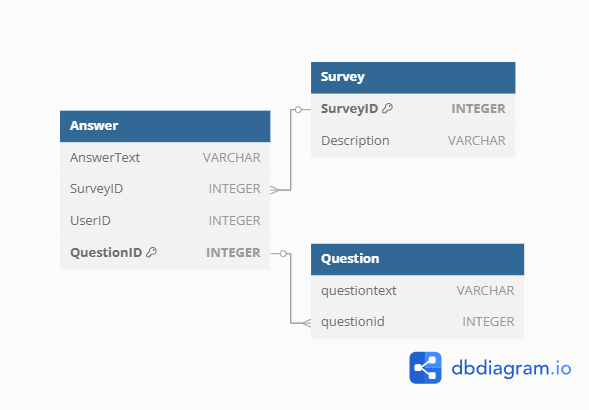

---
# Methodoligy

---
# Functions

Here we have a collection of custom functions that allow us to automate repetative code blocks. When a function is used, a note will be placed above the section it is used in.

In [3]:
def normalize_gender(gender):
    '''
    ---
    this function replaces the wide range of answers given for `What is your gender?` to a smaller set of answers:
    male, female, trans, non_binary, prefer not to say and other.
    ---
    this function is to be used with the .apply() function and must be used with the `AnswerText` column.
    ---
    '''

    g = gender.lower().strip()
    if g in ['male', 'man', 'cis male', 'cis man', 'masculine', 'm', 'mail', 'cis-male', 'cis-man', 'cis-mail']:
        return 'male'
    elif g in ['female', 'f', 'woman', 'cis female', 'cis woman', 'femanine', 'cis-female', 'cis-woman', 'cis-femail']:
        return 'female'
    elif 'trans' in g:
        return 'trans'
    elif 'non-binary' in g or 'genderqueer' in g or 'genderfluid' in g:
        return 'non-binary'
    elif g in ['na', 'n/a', '', 'none', 'no']:
        return 'prefer not to say'
    else:
        return 'other'

In [4]:
def calc_percent(df, col):
    '''
    ---
    this function is used to calculate the percentage in a given column for each unique input. 
    ---
    example : engineer is 20% of the answers given.
    ---
    requirements : what df(str) to act upon. this df must be created from the given sql file and MUST have count() as count in the query, 
    as the code relies on a count column. col(str).
    ---
    '''
    
    df = df
    
    for index, row in df.iterrows():
        data = row[col]
        s = df[df[col] == data]['count'].values[0]
        l = sum(df['count'])
        t = round((s / l) * 100, 2)
        print(f'{data} is {t} % of this survey, siting at {s} in total.\n---')

In [5]:
def calc_percent_gender(df, col):
    '''
    ---
    this function works identically to calc_percent, however had to be modified for gender calculations as the query used to create
    the gender df was not working properly when using count when attempting to create a plot with the data.
    ---
    example : male is 40% of the answers given in this survey.
    ---
    requirments : what df(str) to act upon. when this df is created with an sql query, it CANNOT have count used in the select statement,
    as this causes issues with plotting. col(str).
    ---
    '''
    
    counts = df[col].value_counts()

    t = len(df)

    for val in counts.index:
        count = counts[val]
        p = round((count / t) * 100, 2)
        print(f'{val} is {p} % of this survey, sitting at {count} in total.\n---')

# Exploritory Data Analysis

In [6]:
conn = sqlite3.connect('mental_health.sqlite')

In [7]:
tables_query = "select name from sqlite_master where type = 'table';"
tables = pd.read_sql(tables_query, conn)
tables

,name
0,Answer
1,Question
2,Survey


In [8]:
pd.read_sql('''
select *
from Question;
''', conn)

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [9]:
pd.read_sql('''
select *
from Answer;
''', conn)

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [10]:
pd.read_sql('''
select *
from Survey;
''', conn)

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [11]:
pd.read_sql('''
select userid
from answer
''',conn)

,UserID
0,1
1,2
2,3
3,4
4,5
...,...
236893,2689
236894,2690
236895,2691
236896,2692


In [12]:
pd.read_sql('''
select answertext as answer, count(*) as count
from answer as a
left join question as q
on a.questionid = q.questionid
where questiontext = 'What is your gender?'
group by a.answertext
order by count desc
''',conn)

,answer,count
0,Male,2830
1,Female,914
2,male,212
3,female,110
4,-1,24
...,...,...
96,Agender/genderfluid,1
97,Agender trans woman,1
98,AFAB,1
99,A little about you,1


---
# Data Insight

- Gender and Age Spread

- Industry Representation
 
- Mental Health

## Gender breakdown

In [13]:
pd.read_sql('''
select answertext, count(*) as count
from answer as a
left join question as q
on a.questionid = q.questionid
where questiontext = 'What is your gender?'
group by a.answertext
order by count desc
''', conn)

,AnswerText,count
0,Male,2830
1,Female,914
2,male,212
3,female,110
4,-1,24
...,...,...
96,Agender/genderfluid,1
97,Agender trans woman,1
98,AFAB,1
99,A little about you,1


In [14]:
df_gender_spread = pd.read_sql('''
select answertext
from answer as a
left join question as q
on a.questionid = q.questionid
where questiontext = 'What is your gender?'
''', conn)

In [15]:
df_gender_spread

,AnswerText
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
4213,something kinda male?
4214,sometimes
4215,trans woman
4216,transgender


In [16]:
#df_gender_spread['gender'].value_counts().head(20)

In [17]:
# This cell is used to display the wide range of different answers for `what is your gender?`.
# Remove the pound symbols below to see the result

#with pd.option_context('display.max_rows', None):
#    print(df_gender_spread.value_counts())

- Function utilized:
    - `normalize_gender`
        - reduces the wide range of answers to a few that can be used for analysis.

In [18]:
df_gender_spread['AnswerText'] = df_gender_spread['AnswerText'].apply(normalize_gender)

In [19]:
with pd.option_context('display.max_rows', None):
    print(df_gender_spread.value_counts())

AnswerText       
male                 3044
female               1024
other                 102
non-binary             27
trans                  17
prefer not to say       4
Name: count, dtype: int64


<Axes: ylabel='AnswerText'>

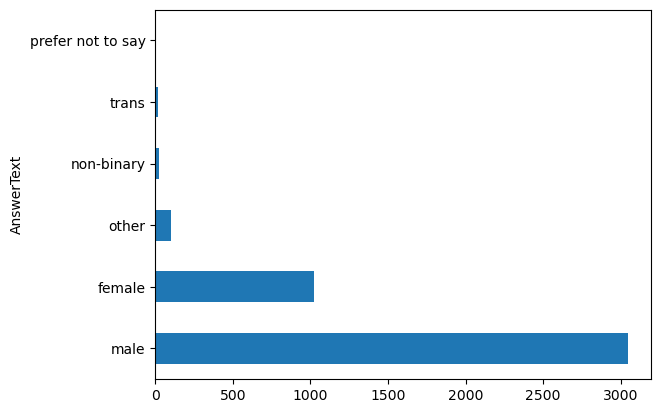

In [20]:
df_gender_spread['AnswerText'].value_counts().plot( kind = 'barh')

- function utilized:
    - `calc_percent_gender`
        - calculates the percent total for each gender

In [21]:
calc_percent_gender(df_gender_spread, 'AnswerText')

male is 72.17 % of this survey, sitting at 3044 in total.
---
female is 24.28 % of this survey, sitting at 1024 in total.
---
other is 2.42 % of this survey, sitting at 102 in total.
---
non-binary is 0.64 % of this survey, sitting at 27 in total.
---
trans is 0.4 % of this survey, sitting at 17 in total.
---
prefer not to say is 0.09 % of this survey, sitting at 4 in total.
---


## Age Spread

In [22]:
pd.read_sql('''
select answertext
from answer as a 
left join question as q 
on a.questionid = q.questionid
where questiontext = 'What is your age?'
group by answertext;
''', conn)

,AnswerText
0,-1
1,-29
2,0
3,11
4,15
...,...
60,70
61,72
62,74
63,8


In [23]:
df_age_spread = pd.read_sql('''
select cast(answertext as integer) as age
from answer as a 
left join question as q 
on a.questionid = q.questionid
where q.questiontext = 'What is your age?' and
age between 1 and 80
group by age
order by age asc;
''', conn)

In [ ]:
fig, ax = plt.subplots()

df_age_spread['age'].astype(int).plot(kind = 'hist')
avg_age = round(sum(df_age_spread['age']) / len(df_age_spread['age']), 1)

ax.axvline(avg_age, color = 'r')
ax.set_xlabel('Age')
ax.set_title('Age Ranges')
plt.legend(['Age','Average Age'])
plt.show();

In [ ]:
avg_age

In [ ]:
print(f'25% of ages are below {np.percentile(df_age_spread['age'], 25)}')
print(f'50% of ages are below {np.percentile(df_age_spread['age'], 50)}')
print(f'75% of ages are below {np.percentile(df_age_spread['age'], 75)}')

In [ ]:
fig, ax = plt.subplots()

df_age_spread['age'].plot(kind = 'box', vert = False)

ax.set_title('Age Percentile Distribution')
plt.show();

---
## Industry Representation

In [ ]:
df_question = pd.read_sql('''
select questiontext
from question as q
''',conn)

In [ ]:
# This cell is used to display all of the questions contained in this survey.
# Remove the pound symbols below to see the result

#pd.set_option('display.max_colwidth', None)
#for f in df_question.iterrows():
#    print(f)

In [ ]:
pd.option_context('display.max_colwidth', None)

In [ ]:
pd.read_sql('''
select questiontext
from question as q
where questionid = 9
''',conn)

In [ ]:
pd.read_sql('''
select answertext, count(answertext) as count
from answer as a 
where questionid = 9
group by answertext
''',conn)

In [ ]:
pd.read_sql('''
select questiontext
from question as q
where questionid = 13
''',conn)

In [ ]:
pd.read_sql('''
select answertext, count(answertext) as count
from question as q
left join answer as a
 on q.questionid = a.questionid
where q.questionid = 13
group by answertext
''',conn)

In [ ]:
pd.read_sql('''
select questiontext
from question
where questiontext = 'Which of the following best describes your work position?'
''',conn)

In [ ]:
pd.reset_option('display.max_colwidth')

In [ ]:
pd.read_sql('''
select answertext, count(answertext) as count
from answer as a
left join question as q
on a.questionid = q.questionid
where questiontext = 'Which of the following best describes your work position?'
group by answertext
order by count desc
''',conn)

In [ ]:
job_spread = pd.read_sql('''
select answertext as job, count(answertext) as count
from answer as a
left join question as q
on a.questionid = q.questionid
where questiontext = 'Which of the following best describes your work position?'
group by job
order by count desc
''',conn)

In [ ]:
fig, ax = plt.subplots()
job_spread.plot(x = 'job', kind = 'barh', ax = ax)

ax.set_title('Job Spread')
ax.set_xlabel('Count')
plt.show();

- function utilized:
    - `calc_percent`
        - calcualtes the percentage of each unique input for a given column

In [ ]:
calc_percent(job_spread, 'job')

---
## Mental Health 

In [ ]:
pd.set_option('display.max_colwidth', None)
for f in df_question.iterrows():
    print(f)

34, Have you ever been diagnosed with a mental health disorder?

In [ ]:
mental_health_df = pd.read_sql('''
select answertext, count(answertext) as count
from answer as a
left join question as q
on a.questionid = q.questionid
where questiontext = 'Have you ever been diagnosed with a mental health disorder?'
group by answertext
''',conn)

In [ ]:
mental_health_df = mental_health_df.replace({'-1' : 'prefer not to say'})

In [ ]:
mental_health_df

In [ ]:
fig, ax = plt.subplots()

mental_health_df.plot(x = 'AnswerText', kind = 'barh', ax = ax)

ax.set_title('Have you ever been diagnosed with a mental health disorder?')
plt.show();

In [ ]:
calc_percent(mental_health_df, 'AnswerText')

### Mental health by age, gender and job type

### Age

In [ ]:
# 1 34
pd.read_sql('''
select questionid, questiontext
from question
where questiontext like '%age%' or questiontext like '%diagnose%'
''',conn)

In [ ]:
age_diagnosis = pd.read_sql('''
select a1.answertext as age, a2.answertext as diagnosis
from answer as a1
left join answer as a2
on a1.userid = a2.userid
where a1.questionid = 1 and
a2.questionid = 34 and 
age between 19 and 60 
''',conn)

In [ ]:
age_diagnosis.head()

In [ ]:
age_diagnosis = age_diagnosis.replace({'-1': 'prefer not to say'})

In [ ]:
age_diagnosis[age_diagnosis['age'] == '323']

In [ ]:
age_diagnosis = age_diagnosis.replace({'323' : '32'})

In [ ]:
age_diagnosis[age_diagnosis['age'] == '3']

In [ ]:
age_diagnosis.drop(650, inplace = True)

In [ ]:
counts_a = age_diagnosis.groupby(['age', 'diagnosis']).size().unstack(fill_value = 0)

In [ ]:
fig, ax = plt.subplots()

counts_a.plot(kind = 'bar', stacked = True, ax = ax)
ax.set_title('Have you ever been diagnosied with mental illness by age')
ax.set_ylabel('count')
plt.show();

### Gender

In [ ]:
pd.read_sql('''
select questionid, questiontext
from question
where questiontext like '%gender%' or questiontext like '%diagnose%'
''',conn)

In [ ]:
# 2 34
gender_diagnosis = pd.read_sql('''
select a1.answertext as gender, a2.answertext as diagnosis
from answer as a1
left join answer as a2
on a1.userid = a2.userid
where a1.questionid = 2 and
a2.questionid = 34 
''',conn)

In [ ]:
gender_diagnosis.head()

In [ ]:
gender_diagnosis['gender'] = gender_diagnosis['gender'].apply(normalize_gender)

In [ ]:
gender_diagnosis = gender_diagnosis.replace({'-1' : 'prefer not to say'})

In [ ]:
gender_diagnosis.value_counts()

In [ ]:
counts_g = gender_diagnosis.groupby(['gender', 'diagnosis']).size().unstack(fill_value = 0)

In [ ]:
fig, ax = plt.subplots()

counts_g.plot(kind = 'barh', stacked = False, ax = ax)
ax.set_title('Have you ever been diagnosied with mental illness by gender')
ax.set_xlabel('count')
plt.show();

### Job Type

In [ ]:
# 117 34
pd.read_sql('''
select questionid, questiontext
from question
where questiontext like '%position%' or questiontext like '%diagnose%'
''',conn)

In [ ]:
work_diagnosis = pd.read_sql('''
select a1.answertext as job, a2.answertext as diagnosis
from answer as a1
left join answer as a2
on a1.userid = a2.userid
where a1.questionid = 117 and
a2.questionid = 34 
''',conn)

In [ ]:
work_diagnosis.value_counts()

In [ ]:
counts_j = work_diagnosis.groupby(['job', 'diagnosis']).size().unstack(fill_value = 0)

In [ ]:
fig, ax = plt.subplots()

counts_j.plot(kind = 'barh', stacked = False, ax = ax)
ax.set_title('Have you ever been diagnosied with mental illness by job')
ax.set_xlabel('count')
plt.show();